<a href="https://colab.research.google.com/github/kosijnova/Integral/blob/main/Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Program do liczenia całki oznaczonej!
------------------------------------
(C) inż. Piotr Krystosiak
    
Rectangle:  1919489.1474
Trapezoidal:  1919863.5311
Monte Carlo:  1928056.641


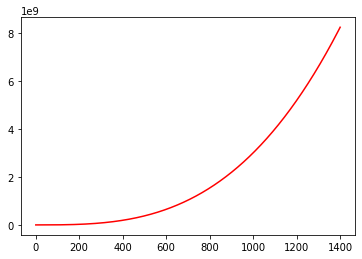

In [5]:
class WrongMethod(Exception):
    pass

class NotStringError(Exception):
    pass

class NotIntError(Exception):
    pass

class StopLessThanStart(Exception):
    pass

def title():
    print("""
AREA UNDER THE CURVE!
------------------------------------
(C) inż. Piotr Krystosiak
    """)
    return ""
    
def integral(function: str, x_start: float, x_stop: float, n: int = 10, method: str = "P", monteCarloIteration = 1000) -> float:
    try:
        if not isinstance(function, str):
            raise NotStringError
        if method not in ["P", "T", "MC"]:
            raise WrongMethod
        if not isinstance(n, int):
            raise NotIntError
        if x_stop < x_start:
            raise StopLessThanStart
    except NotStringError:
        print("Function is not a string!")
        pass
    except WrongMethod:
        print("Wrong method!")
        pass
    except NotIntError:
        print("N is not an int!")
        pass
    except StopLessThanStart:
        print("X_STOP less than X_START!")
        pass
    else:
        if method == "P":
            dx = (x_stop - x_start)/n
            out = 0
            for i in range(n):
                x = x_start + dx * i
                out += dx * eval(function)
            return round(out,4)
        elif method == "T":
            dx = (x_stop - x_start)/n 
            out = 0
            for i in range(n):
                x = x_start + (i * dx)
                fa = eval(function)
                x = x_start + ((i+1) * dx)
                fb = eval(function)
                out += ((fa + fb)/2) * dx
            return round(out,4)
        else:
            randVector = np.random.uniform(0, 1, monteCarloIteration)
            x = x_start + randVector * (x_stop - x_start)

            f_out = eval(function)

            out = ((x_stop - x_start)/monteCarloIteration) * np.sum(f_out)

            return round(out, 4)

        
def f_print(function,x_start,x_stop):
    try:
        if not isinstance(function,str):
            raise NotStringError
    except NotStringError:
        print("Not a string!")
        pass
    else:
        x = np.arange(x_start,x_stop,0.25)
        y = eval(function)
        plt.plot(x,y,color = "red")
        plt.show
       

if __name__ == "__main__":
    import numpy as np
    from matplotlib import pyplot as plt
    
    func = "np.cos(7*x)-np.log(2*x)+(3*x**3)"
    x_start = 1
    x_stop = 40
    
    title()
    print("Rectangle: ",integral(func,x_start,x_stop,10000,"P"))
    print("Trapezoidal: ",integral(func,x_start,x_stop,10000,"T"))
    print("Monte Carlo: ",integral(func,x_start,x_stop,10000,"MC", 10000))

    f_print(func,1,1400)